In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# Importing Neccesary Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split  #separador variables train y valid
from sklearn.ensemble import RandomForestClassifier #Modelo para predecir Clasificacion
from sklearn.metrics import confusion_matrix #Matriz de Confusion
from sklearn.metrics import accuracy_score  #Calculador de exactitud
from sklearn.metrics import f1_score   #Calculador combinado de precision y sensibilidad(da una vision más general)
from sklearn.metrics import precision_score #Calculador de precision
from sklearn.metrics import recall_score #Calculador de la sensibilidad del modelo(ratio TruePositives(positivos detectados)/RealPositives(todos los positivos))
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import OneHotEncoder # Codificador ONE HOT para var categ
from sklearn.preprocessing import OrdinalEncoder # Codificador Ordinal para var categ
from sklearn.compose import ColumnTransformer  #Transformador de cols para el Pipelin
from sklearn.pipeline import Pipeline  #Configuracion del Pipeline
from sklearn.impute import SimpleImputer #Codificador simple para var categ
from sklearn.model_selection import cross_val_score # Evaluador Cross-Validation
from xgboost import XGBClassifier #Modelo XGBoost para predicciones de Clasificac

# Helpful functions

Notebook Color Scheme:


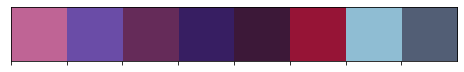

Notebook Color Scheme2:


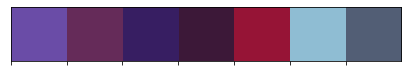

In [3]:
# Custom colors
class clr:
    S = '\033[1m' + '\033[90m'
    E = '\033[0m'
my_colors = ["#bf6495", "#6a4ca7", "#652b59", "#371e62", "#3c1838", "#961436", "#8FBDD3", "#525E75"]

my_colors2=["#6a4ca7", "#652b59", "#371e62", "#3c1838", "#961436", "#8FBDD3", "#525E75"]

print(clr.S+"Notebook Color Scheme:"+clr.E)
sns.palplot(sns.color_palette(my_colors))
plt.show()

print(clr.S+"Notebook Color Scheme2:"+clr.E)
sns.palplot(sns.color_palette(my_colors2))
plt.show()

#======Show Values on Barplot========
import numpy as np
def show_values_on_bars(axs, h_v="v", space=.01):
    def _single(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)
        


# The Data

In [4]:
##Reading the data
X=pd.read_csv("../input/spaceship-titanic/train.csv")
Xtest=pd.read_csv("../input/spaceship-titanic/test.csv", index_col='PassengerId')

##Size of the Traindata
print(clr.S+"The size of the Traindata is:"+clr.E, X.shape)
print()
##showing a glimpse of Traindata
X.head()

The size of the Traindata is: (8693, 14)



,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
#Traindata General Info
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [6]:
#Some statistics of Training Data
X.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
print(clr.S+'the rows count of the Training Data before treat duplicates is:'+clr.E, X.shape[0], 'rows')

the rows count of the Training Data before treat duplicates is: 8693 rows


In [8]:
X.drop_duplicates(subset=None, keep='first', inplace=True, ignore_index=False)
print(clr.S+'the rows count after eliminate duplicates shows:'+clr.E, X.shape[0], 'rows')

the rows count after eliminate duplicates shows: 8693 rows


**That last result show us that there was no duplicates in the Training Data**

### **How the target behave on Traindata**

In [9]:
#Observing how many transported passengers were
X['Transported'].value_counts()


True     4378
False    4315
Name: Transported, dtype: int64

In [10]:
#Percentage of transported passengers(Transported==True)
((X['Transported'].value_counts()/len(X))*100).round(2)

True     50.36
False    49.64
Name: Transported, dtype: float64

 ### **MISSING VALUES on TRAINING DATA**

In [11]:
miss=X.isnull().sum()
miss_per=miss[miss>0]/(len(X.index))*100
Table = pd.concat([miss, miss_per], axis=1)
nullTable=Table.rename(columns = {0 : 'Missing Values', 1 : '% of Total Values'})
nullTable.sort_values(by=['Missing Values'], ascending=False)


,Missing Values,% of Total Values
CryoSleep,217,2.496261
ShoppingMall,208,2.392730
VIP,203,2.335212
HomePlanet,201,2.312205
Name,200,2.300702
Cabin,199,2.289198
VRDeck,188,2.162660
FoodCourt,183,2.105142
Spa,183,2.105142
Destination,182,2.093639


<Figure size 1656x4536 with 0 Axes>

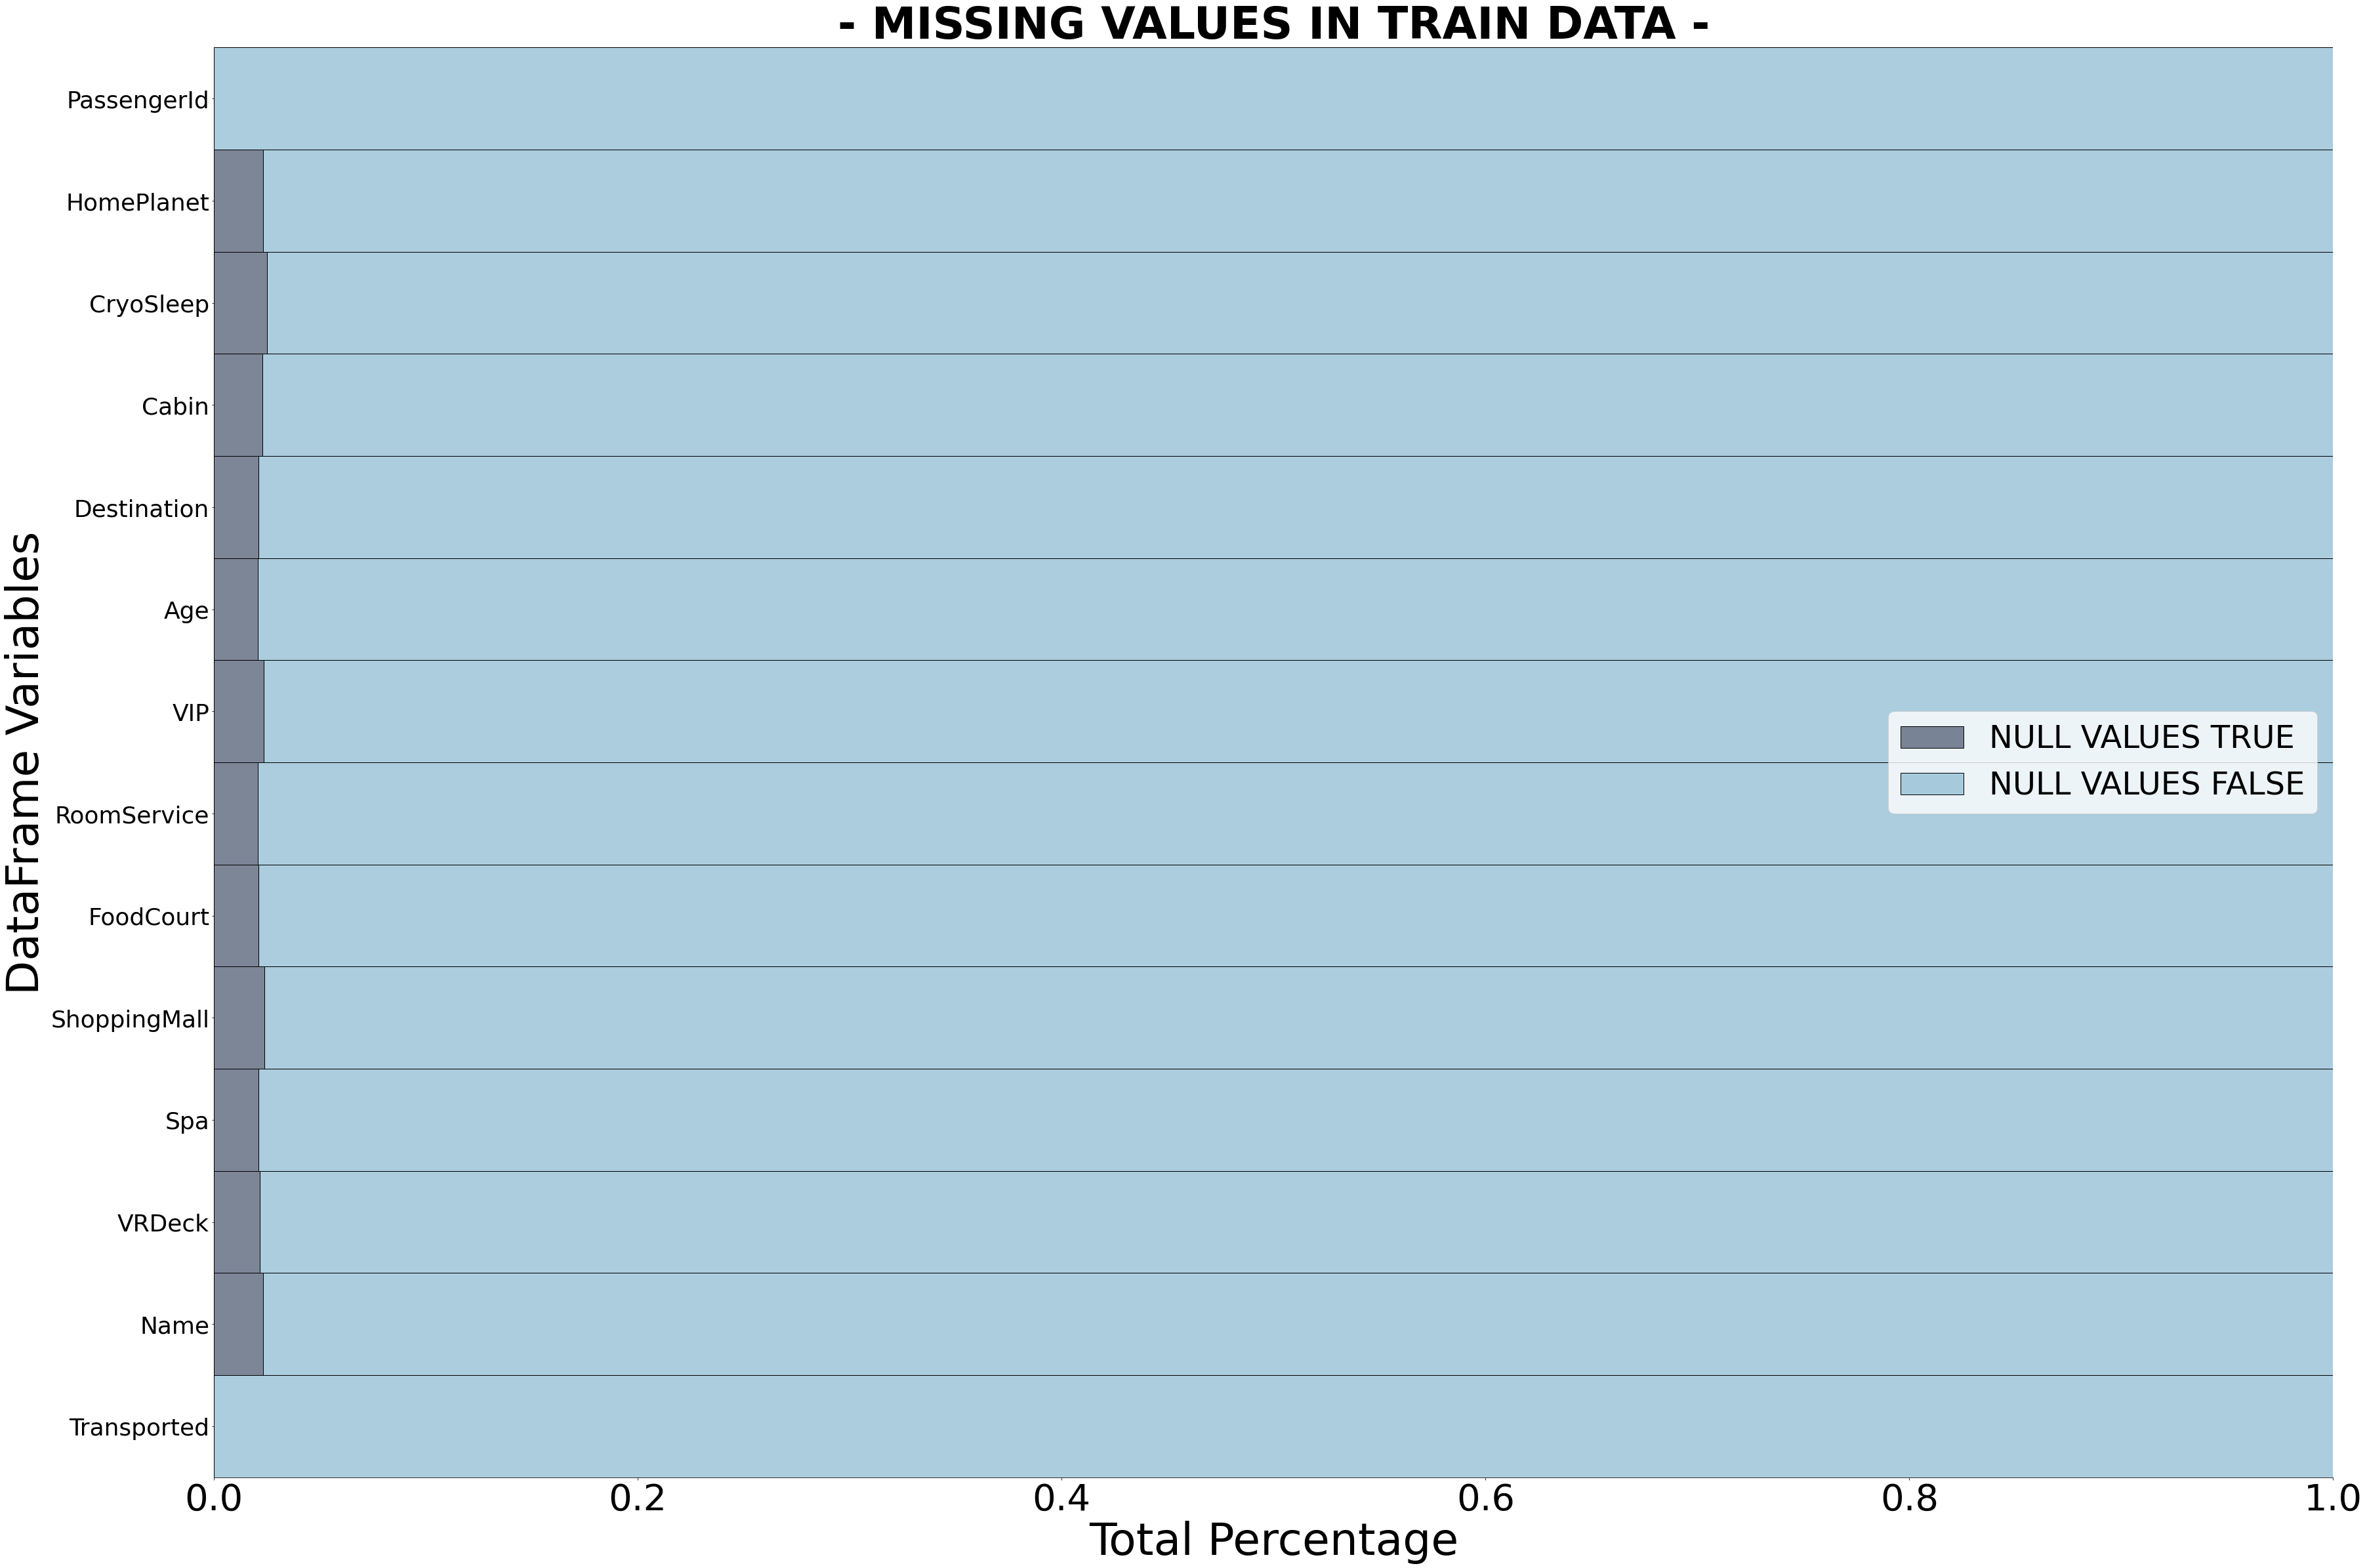

In [12]:
# Show a dataframe of missing values
plt.figure(figsize=(23,63))

sns.displot(
    data=X.isnull().melt(value_name="missing"),
    y="variable",
    hue="missing",
    multiple="fill",
    # Change aspect of the chart
    aspect=1.5,
    height=31,
    # Change colors
    palette=[my_colors[6], my_colors[7]], 
    legend=False)

plt.title("- MISSING VALUES IN TRAIN DATA -", size=68, weight="bold")
plt.xlabel("Total Percentage", size=68)
plt.ylabel("DataFrame Variables", size=68)
plt.xticks(size=56)
plt.yticks(size=36)
plt.legend(["NULL VALUES TRUE", "NULL VALUES FALSE"], loc=5, fontsize=48);

### **OUTLIERS on TRAINING DATA**

Text(0.5, 1.0, '- VISUAL OF OUTLIERS IN TRAIN DATA -')

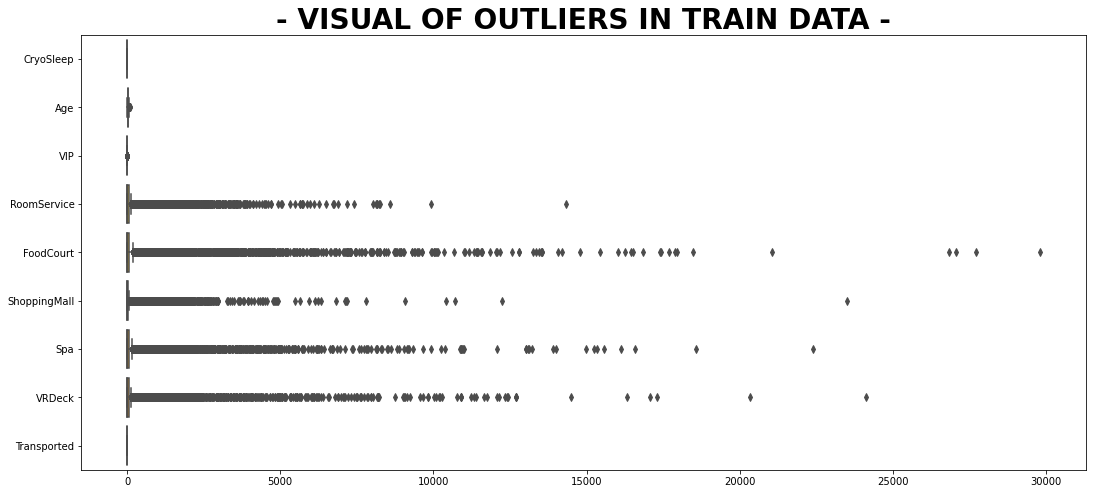

In [13]:
from seaborn import boxplot

#===setting up the boxplot to visualize Outliers in the entire data===
f, ax = plt.subplots(figsize=(18, 8))
boxplot(data=X, orient='h', palette='Wistia')
plt.title("- VISUAL OF OUTLIERS IN TRAIN DATA -", size=28, weight="bold")

In [14]:
#=======Identifying Outliers in training dataset======

#outliers column 'Age'

q1a=X['Age'].quantile(0.25)
q3a=X['Age'].quantile(0.75)
iqr=q3a-q1a
x=1.5*iqr
limax=(q3a+x)
limin=(q1a-x)
outage= (X['Age'] < limin) | (X['Age'] > limax)
atipicoa=X[outage]
print(clr.S+"THIS IS THE COUNT OF OUTLIERS:"+clr.E)
print(atipicoa[['Age']].count())

#outliers column 'VIP'

q1v=X['VIP'].quantile(0.25)
q3v=X['VIP'].quantile(0.75)
iqrv=q3v-q1v
xv=1.5*iqrv
limaxv=(q3v+xv)
liminv=(q1v-xv)
outvip= (X['VIP'] < liminv) | (X['VIP'] > limaxv)
atipicov=X[outvip]
print(atipicov[['VIP']].count())

#outliers column 'RoomService '

q1r=X['RoomService'].quantile(0.25)
q3r=X['RoomService'].quantile(0.75)
iqrr=q3r-q1r
xr=1.5*iqrr
limaxr=(q3r+xr)
liminr=(q1r-xr)
outroom= (X['RoomService'] < liminr) | (X['RoomService'] > limaxr)
atipicor=X[outroom]
print(atipicor[['RoomService']].count())

#outliers column 'FoodCourt'

q1f=X['FoodCourt'].quantile(0.25)
q3f=X['FoodCourt'].quantile(0.75)
iqrf=q3f-q1f
xf=1.5*iqrf
limaxf=(q3f+xf)
liminf=(q1f-xf)
outfood= (X['FoodCourt'] < liminf) | (X['FoodCourt'] > limaxf)
atipicof=X[outfood]
print(atipicof[['FoodCourt']].count())

#outliers column 'ShoppingMall'

q1s=X['ShoppingMall'].quantile(0.25)
q3s=X['ShoppingMall'].quantile(0.75)
iqrs=q3s-q1s
xs=1.5*iqrs
limaxs=(q3s+xs)
limins=(q1s-xs)
outshop= (X['ShoppingMall'] < limins) | (X['ShoppingMall'] > limaxs)
atipicos=X[outshop]
print(atipicos[['ShoppingMall']].count())

#outliers column 'Spa'

q1sp=X['Spa'].quantile(0.25)
q3sp=X['Spa'].quantile(0.75)
iqrsp=q3sp-q1sp
xsp=1.5*iqrsp
limaxsp=(q3sp+xsp)
liminsp=(q1sp-xsp)
outspa= (X['Spa'] < liminsp) | (X['Spa'] > limaxsp)
atipicosp=X[outspa]
print(atipicosp[['Spa']].count())

#outliers column 'VRDeck'

q1vr=X['VRDeck'].quantile(0.25)
q3vr=X['VRDeck'].quantile(0.75)
iqrvr=q3vr-q1vr
xvr=1.5*iqrvr
limaxvr=(q3vr+xvr)
liminvr=(q1vr-xvr)
outvrd= (X['VRDeck'] < liminvr) | (X['VRDeck'] > limaxvr)
atipicovr=X[outvrd]
print(atipicovr[['VRDeck']].count())

THIS IS THE COUNT OF OUTLIERS:
Age    77
dtype: int64
VIP    199
dtype: int64
RoomService    1861
dtype: int64
FoodCourt    1823
dtype: int64
ShoppingMall    1829
dtype: int64
Spa    1788
dtype: int64
VRDeck    1809
dtype: int64


In [15]:
#Showing Outliers as % of total
Ageout=(atipicoa[['Age']].count()/len(X['Age']))*100
print(clr.S+'Percent of Outliers'+clr.E, Ageout)

VIPout=(atipicov[['VIP']].count()/len(X['VIP']))*100
print(clr.S+'Percent of Outliers'+clr.E, VIPout)

Roomout=(atipicor[['RoomService']].count()/len(X['RoomService']))*100
print(clr.S+'Percent of Outliers'+clr.E, Roomout)

Foodout=(atipicof[['FoodCourt']].count()/len(X['FoodCourt']))*100
print(clr.S+'Percent of Outliers'+clr.E, Foodout)

Shopout=(atipicos[['ShoppingMall']].count()/len(X['ShoppingMall']))*100
print(clr.S+'Percent of Outliers'+clr.E, Shopout)

Spaout=(atipicosp[['Spa']].count()/len(X['Spa']))*100
print(clr.S+'Percent of Outliers'+clr.E, Spaout)

vrdout=(atipicovr[['VRDeck']].count()/len(X['VRDeck']))*100
print(clr.S+'Percent of Outliers'+clr.E, vrdout)

Percent of Outliers Age    0.88577
dtype: float64
Percent of Outliers VIP    2.289198
dtype: float64
Percent of Outliers RoomService    21.408029
dtype: float64
Percent of Outliers FoodCourt    20.970896
dtype: float64
Percent of Outliers ShoppingMall    21.039917
dtype: float64
Percent of Outliers Spa    20.568273
dtype: float64
Percent of Outliers VRDeck    20.809847
dtype: float64


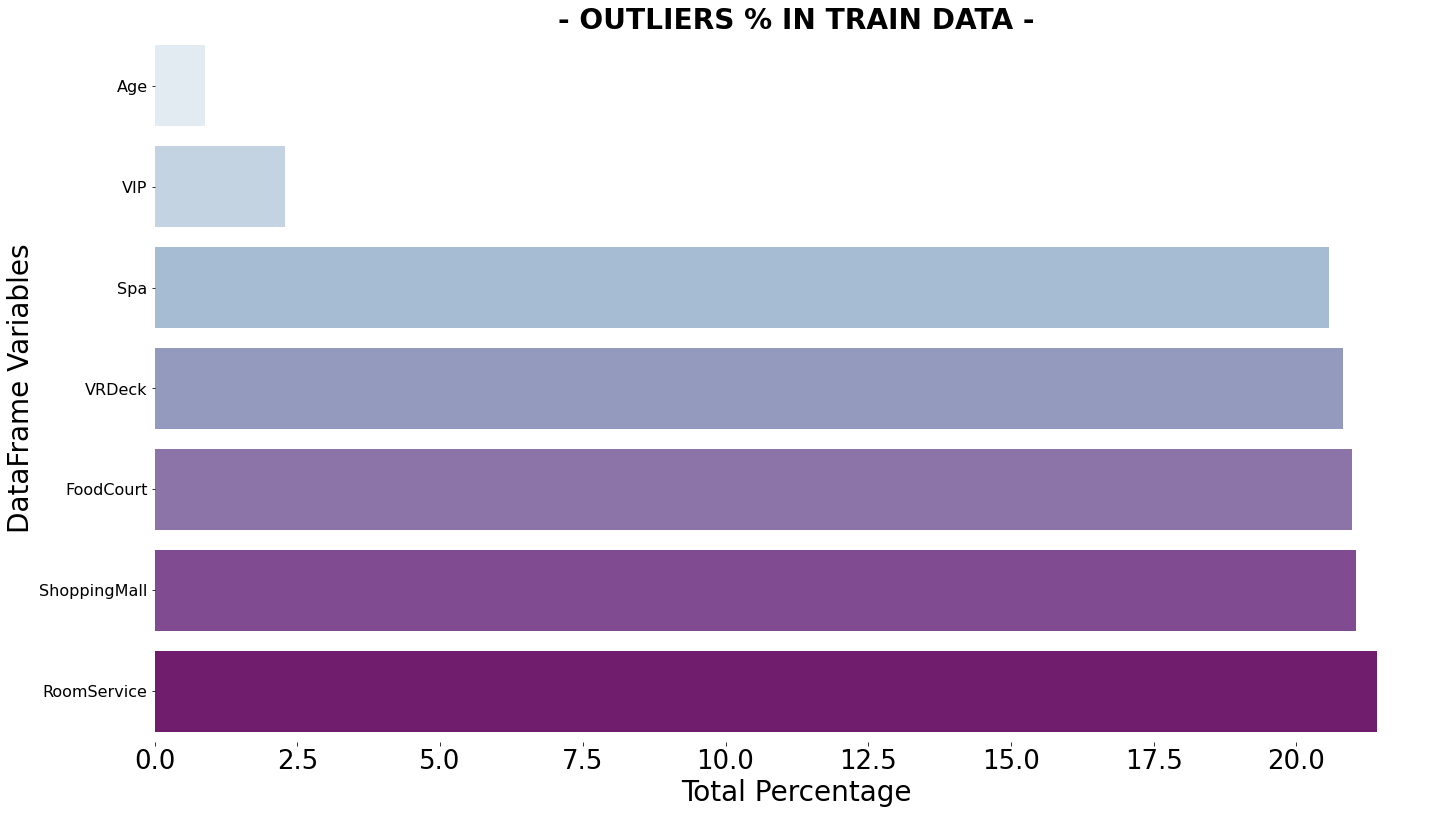

In [16]:
# Show a dataframe of
from matplotlib import patches
plt.figure(figsize=(23,13))

out={'Age':[0.88577], 'VIP':[2.289198], 'RoomService':[21.408029],
                            'FoodCourt':[20.970896], 'ShoppingMall':[21.039917],
                            'Spa':[20.568273], 'VRDeck':[20.809847]}
outliers=pd.DataFrame(data=out)
outs=outliers.sort_values(by= [0], axis=1, ascending=True)
sns.barplot(data=outs, orient='h', palette='BuPu')
plt.title("- OUTLIERS % IN TRAIN DATA -", size=28, weight="bold")
plt.xlabel("Total Percentage", size=28)
plt.ylabel("DataFrame Variables", size=28)
plt.xticks(size=26)
plt.yticks(size=16)

sns.despine(left=True, bottom=True)
plt.show();

In [17]:
#Identifying the boundaries of each column

#showing outliers boundaries in column 'Age'
q1a=X['Age'].quantile(0.25)
q3a=X['Age'].quantile(0.75)
iqr=q3a-q1a
x=1.5*iqr
limax=(q3a+x)
limin=(q1a-x)
if limin<=0:
  limin=0
print(clr.S+'Ages below', limin, 'or above', limax, 'are considered Outliers'+clr.E)
print()

#showing outliers boundaries in column 'VIP'
q1v=X['VIP'].quantile(0.25)
q3v=X['VIP'].quantile(0.75)
iqrv=q3v-q1v
xv=1.5*iqrv
limaxv=(q3v+xv)
liminv=(q1v-xv)
if liminv<=0:
  liminv=0
print(clr.S+'VIPs  below', liminv, 'or above', limaxv, 'are considered Outliers'+clr.E)
print()

#showing outliers boundaries in column 'RoomService'
q1r=X['RoomService'].quantile(0.25)
q3r=X['RoomService'].quantile(0.75)
iqrr=q3r-q1r
xr=1.5*iqrr
limaxr=(q3r+xr)
liminr=(q1r-xr)
if liminr<=0:
  liminr=0
print(clr.S+'RoomService charges below', liminr, 'or above', limaxr, 'are considered Outliers'+clr.E)
print()

#showing outliers boundaries in column 'FoodCourt'
q1f=X['FoodCourt'].quantile(0.25)
q3f=X['FoodCourt'].quantile(0.75)
iqrf=q3f-q1f
xf=1.5*iqrf
limaxf=(q3f+xf)
liminf=(q1f-xf)
if liminf<=0:
  liminf=0
print(clr.S+'FoodCourt charges below', liminf, 'or above', limaxf, 'are considered Outliers'+clr.E)
print()

#showing outliers boundaries in column 'ShoppingMall'
q1s=X['ShoppingMall'].quantile(0.25)
q3s=X['ShoppingMall'].quantile(0.75)
iqrs=q3s-q1s
xs=1.5*iqrs
limaxs=(q3s+xs)
limins=(q1s-xs)
if limins<=0:
  limins=0
print(clr.S+'ShoppingMall charges below', limins, 'or above', limaxs, 'are considered Outliers'+clr.E)
print()

#showing outliers boundaries in column 'Spa'
q1sp=X['Spa'].quantile(0.25)
q3sp=X['Spa'].quantile(0.75)
iqrsp=q3sp-q1sp
xsp=1.5*iqrsp
limaxsp=(q3sp+xsp)
liminsp=(q1sp-xsp)
if liminsp<=0:
  liminsp=0
print(clr.S+'Spa charges below', liminsp, 'or above', limaxsp, 'are considered Outliers'+clr.E)
print()

#showing outliers boundaries in column 'VRDeck'
q1vr=X['VRDeck'].quantile(0.25)
q3vr=X['VRDeck'].quantile(0.75)
iqrvr=q3vr-q1vr
xvr=1.5*iqrvr
limaxvr=(q3vr+xvr)
liminvr=(q1vr-xvr)
if liminvr<=0:
  liminvr=0
print(clr.S+'VRDeck charges below', liminvr, 'or above', limaxvr, 'are considered Outliers'+clr.E)
print()

Ages below 0 or above 66.5 are considered Outliers

VIPs  below 0 or above 0.0 are considered Outliers

RoomService charges below 0 or above 117.5 are considered Outliers

FoodCourt charges below 0 or above 190.0 are considered Outliers

ShoppingMall charges below 0 or above 67.5 are considered Outliers

Spa charges below 0 or above 147.5 are considered Outliers

VRDeck charges below 0 or above 115.0 are considered Outliers



#### **Substitution of Outliers**

In [18]:
X.loc[X.Age>66.5,'Age']=X['Age'].median()
X.loc[X.VIP>0,'VIP']=X['VIP'].mean()
X.loc[X.RoomService>117.5,'RoomService']=X['RoomService'].mean()
X.loc[X.FoodCourt>190.0,'FoodCourt']=X['FoodCourt'].mean()
X.loc[X.ShoppingMall>67.5,'ShoppingMall']=X['ShoppingMall'].mean()
X.loc[X.Spa>147.5,'Spa']=X['Spa'].mean()
X.loc[X.VRDeck>115.0,'VRDeck']=X['VRDeck'].mean()

Text(0.5, 1.0, '- TRAIN DATA with OUTLIERS SUBSTITUTION -')

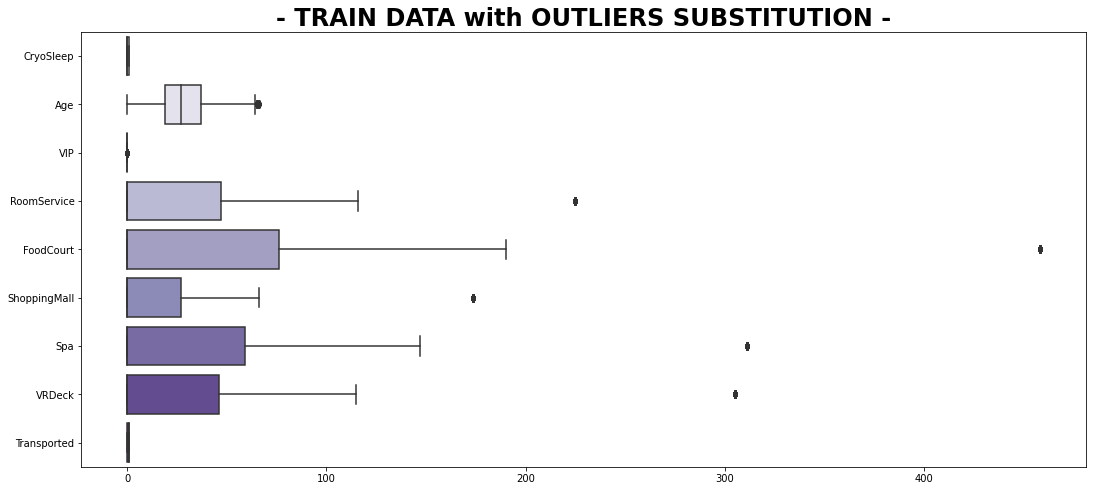

In [19]:
###setting up the boxplot to visualize Outliers in the entire data###
f, ax = plt.subplots(figsize=(18, 8))
boxplot(data=X, orient='h', palette='Purples')
plt.title("- TRAIN DATA with OUTLIERS SUBSTITUTION -", size=24, weight="bold")

In [20]:
#===The new statistics for the Traindata after treating OUTLIERS===
X.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.429175,52.898221,104.765422,39.710860,71.394963,69.008268
std,13.911704,92.092463,186.234930,70.785346,125.432229,123.562137
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,66.000000,224.687617,458.077203,173.729169,311.138778,304.854791


## **Are youngest passengers the most transported?**

Text(0.5, 1.0, 'Age Histogram')

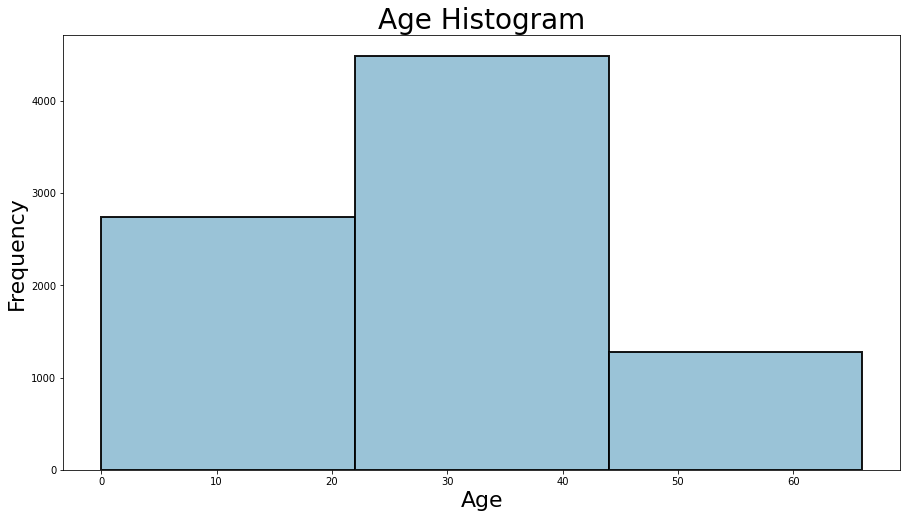

In [21]:
#SETTING UP THE PLOT
fig, ax = plt.subplots(figsize=(15,8))
#histogram of featur 'Age'
ax.hist(X['Age'],bins = 3,alpha=0.9,density=False, color=my_colors[6], edgecolor='black', linewidth=2, histtype = 'bar', orientation = 'vertical', log=False)
ax.set_xlabel('Age', size=22)
ax.set_ylabel('Frequency', size=22)
ax.set_title('Age Histogram', size=28, weight='normal')

this is the count of transported passengers aged 22 or younger:  1656
this is the count of transported passengers aged between 23 and 44 YO:  2064
this is the count of transported passengers aged 45 or older:  568




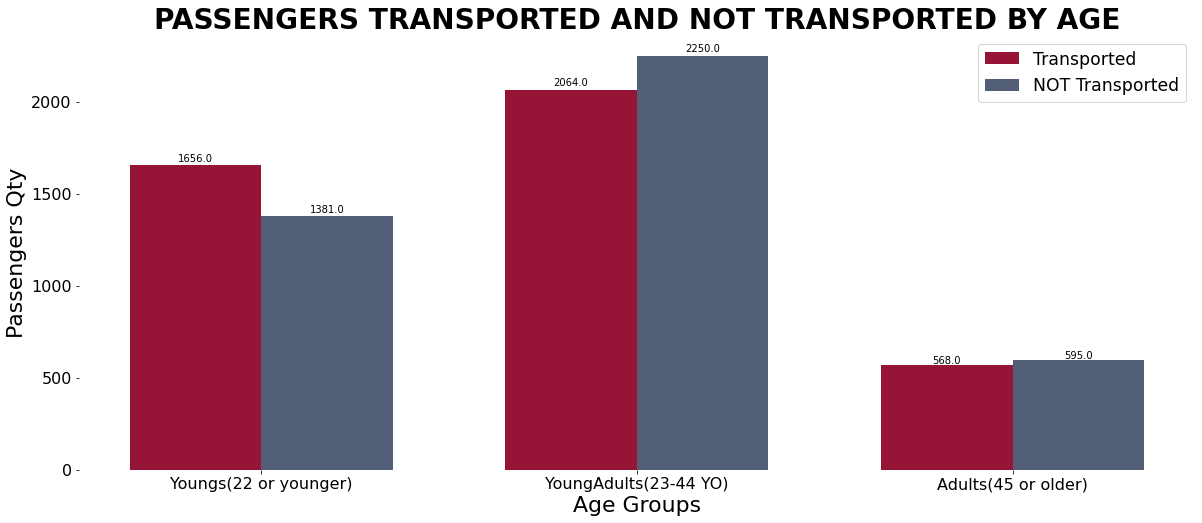

In [22]:
#Passengers by Age
t1= X[(X.Age<= 22)]
t2= X[(X.Age>= 23)&(X.Age<=44)]
t3= X[(X.Age > 44)]
#Passengers Transported by Age
t4= X[(X.Age<= 22) & (X.Transported== True)]
t5= X[(X.Age>= 23)&(X.Age<=44) & (X.Transported== True)]
t6= X[(X.Age> 44) & (X.Transported== True)]

print(clr.S+"this is the count of transported passengers aged 22 or younger: "+clr.E, len(t4.index))
print(clr.S+"this is the count of transported passengers aged between 23 and 44 YO: "+clr.E, len(t5.index))
print(clr.S+"this is the count of transported passengers aged 45 or older: "+clr.E, len(t6.index))
print()
print()
#====SETTING UP THE PLOT===========
width=0.35
etiq=['Youngs(22 or younger)', 'YoungAdults(23-44 YO)', 'Adults(45 or older)']
x = np.arange(len(etiq)) 
y2=[len(t4.index),len(t5.index),len(t6.index)]
#Quantity of NOT Transported can be obtained by subtracting the total of Tranported by Age from the total of passengers by Age
y3=[len(t1.index)-len(t4.index),len(t2.index)-len(t5.index),len(t3.index)-len(t6.index)]

fig,ax=plt.subplots(figsize=(20,8))
tr= plt.bar(x-width/2, y2, color=[my_colors[5]], width=0.35, label="Transported")
nt= plt.bar(x+width/2, y3, color=[my_colors[7]], width=0.35, label="NOT Transported")
plt.legend()
plt.title('PASSENGERS TRANSPORTED AND NOT TRANSPORTED BY AGE', size=28, weight='heavy')
show_values_on_bars(ax, h_v="v", space=.01)
ax.set_xticks(x,['Youngs(22 or younger)', 'YoungAdults(23-44 YO)', 'Adults(45 or older)']) 
ax.set_ylabel('Passengers Qty', size=22)
ax.set_xlabel('Age Groups', size=22)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize='xx-large')
sns.despine(left=True, bottom=True)
plt.show()

### As we can see in the previous graph the most transported were the "YoungAdults" age group SO the answer for the question is NO, the youngest passengers not were the most transported to the unknokwn dimension....

In [23]:
#Let's see the correlations with the Target('Transported')
X.corr()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
Age,1.000000,0.109101,0.193220,0.092116,0.149714,0.142000,-0.075659
RoomService,0.109101,1.000000,0.012682,0.303821,0.077270,0.032802,-0.333786
FoodCourt,0.193220,0.012682,1.000000,0.035669,0.299552,0.350589,-0.096808
ShoppingMall,0.092116,0.303821,0.035669,1.000000,0.088855,0.042825,-0.157009
Spa,0.149714,0.077270,0.299552,0.088855,1.000000,0.258480,-0.333338
VRDeck,0.142000,0.032802,0.350589,0.042825,0.258480,1.000000,-0.308624
Transported,-0.075659,-0.333786,-0.096808,-0.157009,-0.333338,-0.308624,1.000000


### The matrix shows that there is no strong relationship between numerical variables and the Target

In [24]:
#Let's check correlations between categorical variables and the target
from scipy.stats import chi2_contingency

#Let's start evaluating PassengerId
csq=chi2_contingency(pd.crosstab(X['Transported'], X['PassengerId']))
print(clr.S+"1 P-value of PassengerId: "+clr.E,csq[1])

#Let's continue evaluating HomePlanet
csq2=chi2_contingency(pd.crosstab(X['Transported'], X['HomePlanet']))
print(clr.S+"2 P-value for HomePlanet: "+clr.E,csq2[1])

#Let's continue evaluating CryoSleep
csq3=chi2_contingency(pd.crosstab(X['Transported'], X['CryoSleep']))
print(clr.S+"3 P-value for CryoSleep: "+clr.E,csq3[1])

#Let's continue evaluating Cabin
csq4=chi2_contingency(pd.crosstab(X['Transported'], X['Cabin']))
print(clr.S+"4 P-value for Cabin: "+clr.E,csq4[1])

#Let's continue evaluating Destination
csq5=chi2_contingency(pd.crosstab(X['Transported'], X['Destination']))
print(clr.S+"5 P-value for Destination: "+clr.E,csq5[1])

#Let's continue evaluating VIP
csq6=chi2_contingency(pd.crosstab(X['Transported'], X['VIP']))
print(clr.S+"6 P-value for VIP: "+clr.E,csq6[1])

#Let's continue evaluating Name
csq6=chi2_contingency(pd.crosstab(X['Transported'], X['Name']))
print(clr.S+"7 P-value for Name: "+clr.E,csq6[1])
 

1 P-value of PassengerId:  0.49495731665065185
2 P-value for HomePlanet:  2.809059985251311e-71
3 P-value for CryoSleep:  0.0
4 P-value for Cabin:  0.006047486175171033
5 P-value for Destination:  7.892901466137099e-24
6 P-value for VIP:  0.0006804064556968345
7 P-value for Name:  0.4887678645272412


### After seeing p-values of the variables 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination' and 'VIP' I can think that they can apport some valuable info about the target ('Transported') given that their respectives p-values are lower than 0.05 so the null hypothesis (which reads the variables are independent) can be rejected.

In [25]:
X['Destination'].value_counts()   

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

this is the count of transported passengers coming from Planet Earth:  1951
this is the count of transported passengers coming from Planet Europa:  1404
this is the count of transported passengers coming from Planet Mars:  920




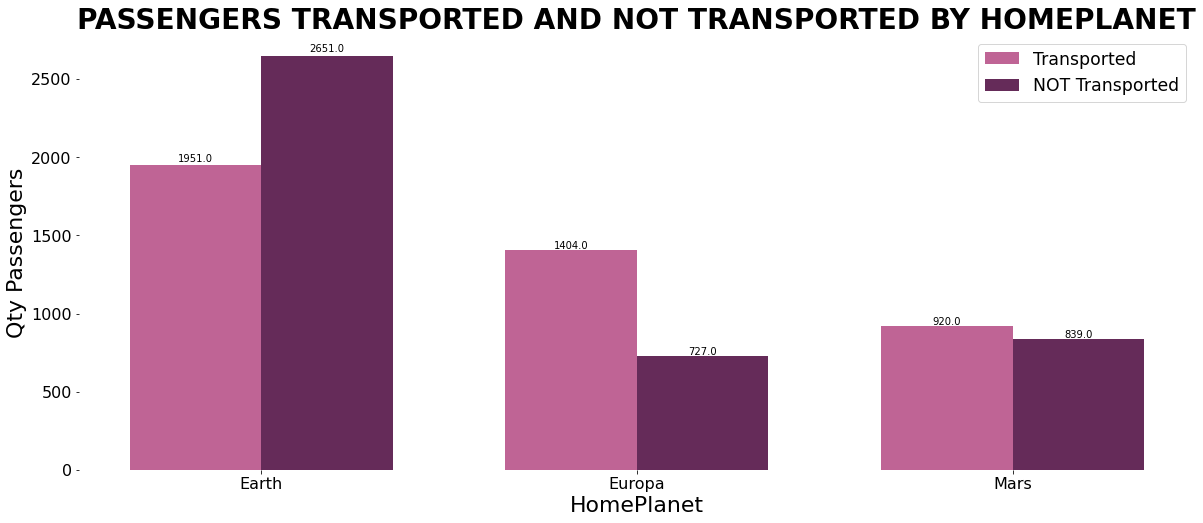

In [26]:
#Passengers by HomePlanet
h1= X[(X.HomePlanet== 'Earth')]
h2= X[(X.HomePlanet== 'Europa')]
h3= X[(X.HomePlanet== 'Mars')]
#Passengers Transported by HomePlanet
h4= X[(X.HomePlanet== 'Earth') & (X.Transported== True)]
h5= X[(X.HomePlanet== 'Europa') & (X.Transported== True)]
h6= X[(X.HomePlanet== 'Mars') & (X.Transported== True)]

print(clr.S+"this is the count of transported passengers coming from Planet Earth: "+clr.E, len(h4.index))
print(clr.S+"this is the count of transported passengers coming from Planet Europa: "+clr.E, len(h5.index))
print(clr.S+"this is the count of transported passengers coming from Planet Mars: "+clr.E, len(h6.index))
print()
print()
#====SETTING UP THE PLOT===========
width=0.35
etiq=['Earth', 'Europa', 'Mars']
x = np.arange(len(etiq)) 
y2=[len(h4.index),len(h5.index),len(h6.index)]
#Quantity of NOT Transported can be obtained by subtracting the total of Tranported by HomePlanet from the total of passengers by HomePlanet 
y3=[len(h1.index)-len(h4.index),len(h2.index)-len(h5.index),len(h3.index)-len(h6.index)]

fig,ax=plt.subplots(figsize=(20,8))
tr= plt.bar(x-width/2, y2, color=[my_colors[0]], width=0.35, label="Transported")
nt= plt.bar(x+width/2, y3, color=[my_colors[2]], width=0.35, label="NOT Transported")
plt.legend()
plt.title('PASSENGERS TRANSPORTED AND NOT TRANSPORTED BY HOMEPLANET', size=28, weight='heavy')
show_values_on_bars(ax, h_v="v", space=.01)
ax.set_xticks(x,etiq) 
ax.set_ylabel('Qty Passengers', size=22)
ax.set_xlabel('HomePlanet', size=22)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize='xx-large')
sns.despine(left=True, bottom=True)
plt.show()

this is the count of transported passengers with Destination TRAPPIST-1e :  2787
this is the count of transported passengers with Destination 55 Cancri e :  1098
this is the count of transported passengers with Destination PSO J318.5-22 :  401




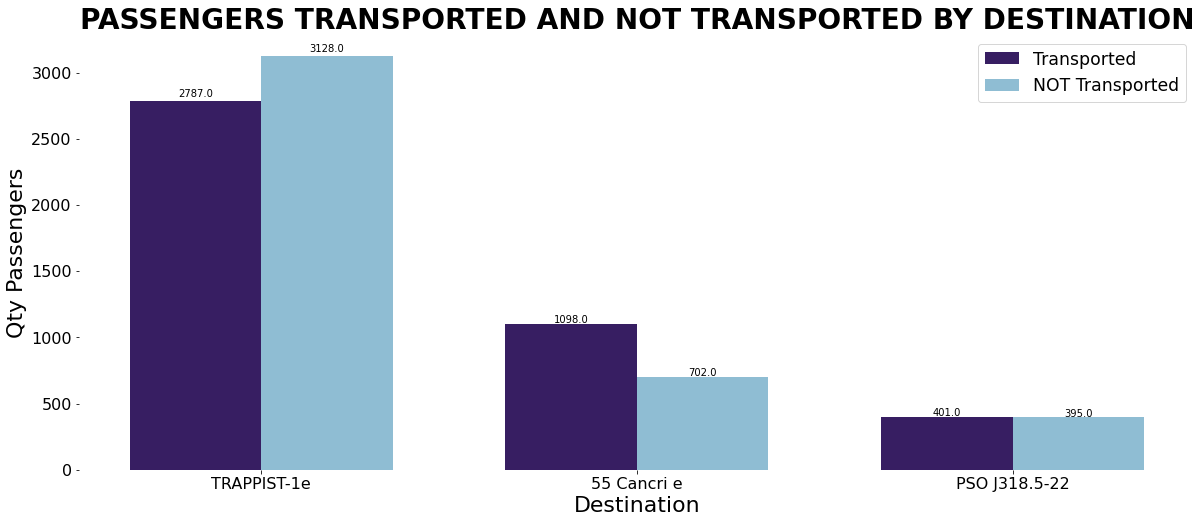

In [27]:
#Passengers by Destination
d1= X[(X.Destination== 'TRAPPIST-1e')]
d2= X[(X.Destination== '55 Cancri e')]
d3= X[(X.Destination== 'PSO J318.5-22')]
#Passengers Transported by Destination
d4= X[(X.Destination== 'TRAPPIST-1e') & (X.Transported== True)]
d5= X[(X.Destination== '55 Cancri e') & (X.Transported== True)]
d6= X[(X.Destination== 'PSO J318.5-22') & (X.Transported== True)]

print(clr.S+"this is the count of transported passengers with Destination TRAPPIST-1e : "+clr.E, len(d4.index))
print(clr.S+"this is the count of transported passengers with Destination 55 Cancri e : "+clr.E, len(d5.index))
print(clr.S+"this is the count of transported passengers with Destination PSO J318.5-22 : "+clr.E, len(d6.index))
print()
print()
#====SETTING UP THE PLOT===========
width=0.35
etiq=['TRAPPIST-1e', '55 Cancri e', 'PSO J318.5-22']
x = np.arange(len(etiq)) 
y2=[len(d4.index),len(d5.index),len(d6.index)]
#Quantity of NOT Transported can be obtained by subtracting the total of Tranported by Destination from the total of passengers by Destination
y3=[len(d1.index)-len(d4.index),len(d2.index)-len(d5.index),len(d3.index)-len(d6.index)]

fig,ax=plt.subplots(figsize=(20,8))
tr= plt.bar(x-width/2, y2, color=[my_colors[3]], width=0.35, label="Transported")
nt= plt.bar(x+width/2, y3, color=[my_colors[6]], width=0.35, label="NOT Transported")
plt.legend()
plt.title('PASSENGERS TRANSPORTED AND NOT TRANSPORTED BY DESTINATION', size=28, weight='heavy')
show_values_on_bars(ax, h_v="v", space=.01)
ax.set_xticks(x,etiq) 
ax.set_ylabel('Qty Passengers', size=22)
ax.set_xlabel('Destination', size=22)
plt.xticks(size=16)
plt.yticks(size=16)
plt.legend(fontsize='xx-large')
sns.despine(left=True, bottom=True)
plt.show()

In [28]:
#Relation between HomePlanet and Destination
csq7=chi2_contingency(pd.crosstab(X['HomePlanet'], X['Destination']))
print(clr.S+"8 P-value for Name: "+clr.E,csq7[1])

8 P-value for Name:  2.0026455334311217e-246


### It seems that HomePlanet and Destination have a very strong dependence on each other

# THE MODELS

### I will use RandomForestClassifier and XGBoostClassifier and score their results in order to choose the best model to make my predictions

In [29]:
#Select Target
y = X.Transported 
#Select Predictors             
X.drop(['Transported'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                                random_state=0)




In [30]:
# Categorical columns in the training data
object_cols = [col for col in X_train_full.columns if X_train_full[col].dtype == "object"]
# Get number of unique entries in each column with categorical data
object_nunique = list(map(lambda col: X_train_full[col].nunique(), object_cols))
d = dict(zip(object_cols, object_nunique))

# Print number of unique entries by column, in ascending order
print(clr.S+"This is the count of unique values for categorical variables:"+clr.E)
sorted(d.items(), key=lambda x: x[1])

This is the count of unique values for categorical variables:


[('CryoSleep', 2),
 ('VIP', 2),
 ('HomePlanet', 3),
 ('Destination', 3),
 ('Cabin', 5449),
 ('Name', 6787),
 ('PassengerId', 6954)]

In [31]:
# "Cardinality" means the number of unique values in a column
# Separating categorical features by cardinality
low_cardinality_cols = [cname for cname in X_train_full.columns if X_train_full[cname].nunique() < 10 and 
                        X_train_full[cname].dtype == "object"]
high_cardinality_cols =[cname for cname in X_train_full.columns if X_train_full[cname].nunique() >= 10 and 
                        X_train_full[cname].dtype == "object"]
# Select numeric columns
numeric_cols = [cname for cname in X_train_full.columns if X_train_full[cname].dtype in ['int64', 'float64']]


# Keep selected columns only(I'll use only low_cardinality_cols for categorical features)
my_cols = low_cardinality_cols + numeric_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = Xtest[my_cols].copy()

In [32]:
#PIPELINE FOR PREPROCESSING DATA=====================
# Preprocessing for numerical data
from sklearn.preprocessing import StandardScaler
numerical_transformer = Pipeline(
                        steps=[
                            ('imputer', SimpleImputer(strategy='mean')),
                            ('scaler', StandardScaler())
                        ]
                      )
# Preprocessing for categorical data with low cardinality
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
     ]
    )

# Merging the preprocessing of numerical data and categorical data in one step
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numeric_cols),
        ('cat', categorical_transformer, low_cardinality_cols)
    ])

In [33]:
#============PIPELINE for PREPROCESSING DATA==============
pipeline= Pipeline(steps=[('preprocessor', preprocessor)])

# Transformation of data 
X_train = pipeline.fit_transform(X_train)
X_valid = pipeline.transform(X_valid)

In [34]:
#DEFINING THE FIRST MODEL
model1= RandomForestClassifier(bootstrap=[False], random_state=42)

#CHOOSING BEST HYPERPARAMS FOR THE MODEL
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': range(400,1000,100),'criterion':['gini', 'entropy']}

grid= GridSearchCV(model1, param_grid, cv=5, scoring='neg_log_loss', n_jobs=-1)

grid.fit(X_train,y_train)

#Returns best parameters for the model
bparam=grid.best_params_
print(bparam)
print()
#Returns best estimators
bestimator = grid.best_estimator_
print(bestimator)

{'criterion': 'gini', 'n_estimators': 800}

RandomForestClassifier(bootstrap=[False], n_estimators=800, random_state=42)


In [35]:
model1= RandomForestClassifier(bootstrap=[False], n_estimators=800, random_state=42, criterion='gini')

#fitting the model
model1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=[False], n_estimators=800, random_state=42)

In [36]:
#Testing predictions on Valid data
preds1=model1.predict(X_valid)

In [37]:
#Scoring the model
print('Confusion-Matrix for Random Forest Classifier: ')
print(confusion_matrix(preds1,y_valid))
print("Accuracy for Random Forest Classifier: ",accuracy_score(preds1,y_valid))
print("Precision for Random Forest Classifier: ",precision_score(preds1,y_valid))
print("Sensitivity for Random Forest Classifier: ", recall_score(preds1,y_valid))
print("F-Score for Random Forest Classifier: ", f1_score(preds1,y_valid))

Confusion-Matrix for Random Forest Classifier: 
[[629 237]
 [234 639]]
Accuracy for Random Forest Classifier:  0.7291546866014951
Precision for Random Forest Classifier:  0.7294520547945206
Sensitivity for Random Forest Classifier:  0.7319587628865979
F-Score for Random Forest Classifier:  0.7307032590051458


In [38]:
#defining SECOND MODEL
model2=XGBClassifier(colsample_bytree=0.5, learning_rate=0.023, n_estimators=700, random_state=42, subsample=0.5)
#fitting the model
model2.fit(X_train, y_train)

/opt/conda/lib/python3.7/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:54:54] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.023, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=700, n_jobs=4, num_parallel_tree=1, predictor='auto',
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.5, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [39]:
#Testing predictions on Valid data
preds2=model2.predict(X_valid)

In [40]:
#Scoring the model
print('Confusion-Matrix for XGBClassifier: ')
print(confusion_matrix(preds2,y_valid))
print("Accuracy for XGBClassifier: ",accuracy_score(preds2,y_valid))
print("Precision for XGBClassifier: ",precision_score(preds2,y_valid))
print("Sensitivity for XGBClassifier: ", recall_score(preds2,y_valid))
print("F-Score for XGBClassifier: ", f1_score(preds2,y_valid))

Confusion-Matrix for XGBClassifier: 
[[650 199]
 [213 677]]
Accuracy for XGBClassifier:  0.7630822311673375
Precision for XGBClassifier:  0.7728310502283106
Sensitivity for XGBClassifier:  0.7606741573033707
F-Score for XGBClassifier:  0.766704416761042


### **I am going to use the XGBClassifier for my predictions considering that the scoring of that model was superior**

In [41]:
#preprocessing X_test data
X_test = pipeline.transform(X_test)

In [42]:
#predictions
predictions=model2.predict(X_test)


In [43]:
out=pd.DataFrame({'PassengerId': Xtest.index, 'Transported':predictions})
print('this is my first submission of "Spaceship Titanic"')
out

this is my first submission of "Spaceship Titanic"


,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,False


In [44]:
out.to_csv('submission.csv', index=False)